In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('SuperStore.csv')
df.head()

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,"261,96",2,0,"41,9136",Furniture,Bookcases,Bush Somerset Collection Bookcase,11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,"731,94",3,0,"219,582",Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,"14,62",2,0,"6,8714",Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,6/12/2019,6/16/2019,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,"957,5775",5,"0,45","-383,031",Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,"22,368",2,"0,2","2,5164",Office Supplies,Storage,Eldon Fold 'N Roll Cart System,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Order_ID        9994 non-null   object
 1   Customer_ID     9994 non-null   object
 2   Postal_Code     9994 non-null   int64 
 3   Product_ID      9994 non-null   object
 4   Sales           9994 non-null   object
 5   Quantity        9994 non-null   int64 
 6   Discount        9994 non-null   object
 7   Profit          9994 non-null   object
 8   Category        9994 non-null   object
 9   Sub-Category    9994 non-null   object
 10  Product_Name    9994 non-null   object
 11  Order_Date      9994 non-null   object
 12  Ship_Date       9994 non-null   object
 13  Ship_Mode       9994 non-null   object
 14  Customer_Name   9994 non-null   object
 15  Segment         9994 non-null   object
 16  Country/Region  9994 non-null   object
 17  City            9994 non-null   object
 18  State   

In [4]:
df.describe()

,Postal_Code,Quantity
count,9994.000000,9994.000000
mean,55190.371023,3.789574
std,32063.704510,2.225110
min,1040.000000,1.000000
25%,23223.000000,2.000000
50%,56430.500000,3.000000
75%,90008.000000,5.000000
max,99301.000000,14.000000


In [5]:
df.isnull().sum()

Order_ID          0
Customer_ID       0
Postal_Code       0
Product_ID        0
Sales             0
Quantity          0
Discount          0
Profit            0
Category          0
Sub-Category      0
Product_Name      0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_Name     0
Segment           0
Country/Region    0
City              0
State             0
Region            0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(1)

# Data Cleaning

In [7]:
df_cleaned = df.copy()
df_cleaned

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,"261,96",2,0,"41,9136",Furniture,Bookcases,Bush Somerset Collection Bookcase,11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,"731,94",3,0,"219,582",Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,"14,62",2,0,"6,8714",Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,6/12/2019,6/16/2019,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,"957,5775",5,"0,45","-383,031",Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,"22,368",2,"0,2","2,5164",Office Supplies,Storage,Eldon Fold 'N Roll Cart System,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2017-110422,TB-21400,33180,FUR-FU-10001889,"25,248",3,"0,2","4,1028",Furniture,Furnishings,Ultra Door Pull Handle,1/21/2017,1/23/2017,Second Class,Tom Boeckenhauer,Consumer,United States,Miami,Florida,South
9990,CA-2020-121258,DB-13060,92627,FUR-FU-10000747,"91,96",2,0,"15,6332",Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,2/26/2020,3/3/2020,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West
9991,CA-2020-121258,DB-13060,92627,TEC-PH-10003645,"258,576",2,"0,2","19,3932",Technology,Phones,Aastra 57i VoIP phone,2/26/2020,3/3/2020,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West
9992,CA-2020-121258,DB-13060,92627,OFF-PA-10004041,"29,6",4,0,"13,32",Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",2/26/2020,3/3/2020,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West


In [8]:
# Update kolom numerik yg masih menggunakan koma menjadi titik

for col in ['Sales', 'Discount', 'Profit'] :
    df_cleaned[col] = df_cleaned[col].str.replace(',','.').astype(float)

df_cleaned

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,Bush Somerset Collection Bookcase,11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,6/12/2019,6/16/2019,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2017-110422,TB-21400,33180,FUR-FU-10001889,25.2480,3,0.20,4.1028,Furniture,Furnishings,Ultra Door Pull Handle,1/21/2017,1/23/2017,Second Class,Tom Boeckenhauer,Consumer,United States,Miami,Florida,South
9990,CA-2020-121258,DB-13060,92627,FUR-FU-10000747,91.9600,2,0.00,15.6332,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,2/26/2020,3/3/2020,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West
9991,CA-2020-121258,DB-13060,92627,TEC-PH-10003645,258.5760,2,0.20,19.3932,Technology,Phones,Aastra 57i VoIP phone,2/26/2020,3/3/2020,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West
9992,CA-2020-121258,DB-13060,92627,OFF-PA-10004041,29.6000,4,0.00,13.3200,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",2/26/2020,3/3/2020,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West


In [9]:
# Konversi datetime
df_cleaned['Order_Date'] = pd.to_datetime(df_cleaned['Order_Date'], errors='coerce')
df_cleaned['Ship_Date'] = pd.to_datetime(df_cleaned['Ship_Date'], errors='coerce')

# Rename Country/Region jadi Country_Region
df_cleaned.rename(columns={'Country/Region': 'Country_Region'}, inplace=True)

df_cleaned

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country_Region,City,State,Region
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,Bush Somerset Collection Bookcase,2019-11-08,2019-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",2019-11-08,2019-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,2019-06-12,2019-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2017-110422,TB-21400,33180,FUR-FU-10001889,25.2480,3,0.20,4.1028,Furniture,Furnishings,Ultra Door Pull Handle,2017-01-21,2017-01-23,Second Class,Tom Boeckenhauer,Consumer,United States,Miami,Florida,South
9990,CA-2020-121258,DB-13060,92627,FUR-FU-10000747,91.9600,2,0.00,15.6332,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,2020-02-26,2020-03-03,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West
9991,CA-2020-121258,DB-13060,92627,TEC-PH-10003645,258.5760,2,0.20,19.3932,Technology,Phones,Aastra 57i VoIP phone,2020-02-26,2020-03-03,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West
9992,CA-2020-121258,DB-13060,92627,OFF-PA-10004041,29.6000,4,0.00,13.3200,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",2020-02-26,2020-03-03,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West


# EDA

## 1. Distribusi Sales

[]

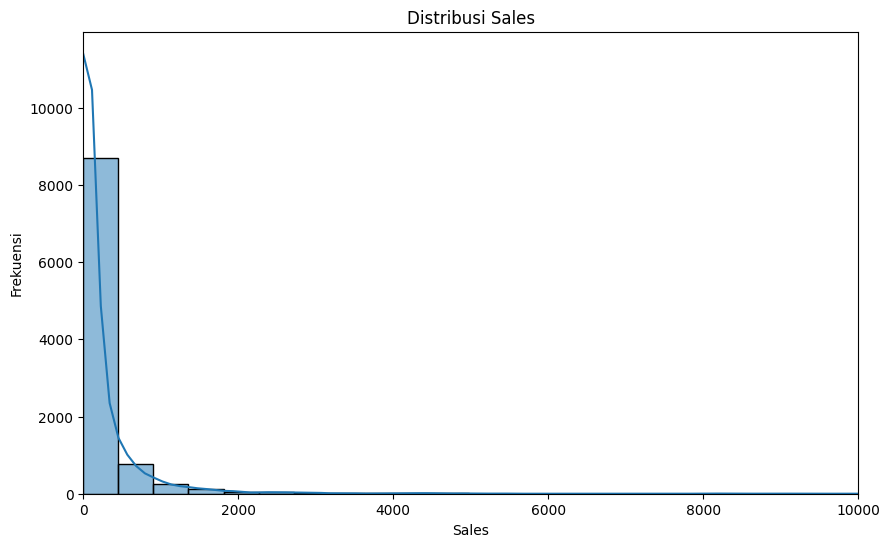

In [10]:
fig = plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Sales'], bins=50, kde=True)
plt.title('Distribusi Sales')
plt.ylabel('Frekuensi')
plt.xlabel('Sales')
plt.xlim(0, 10000)
plt.plot()

## 2. Heatmap Correlation

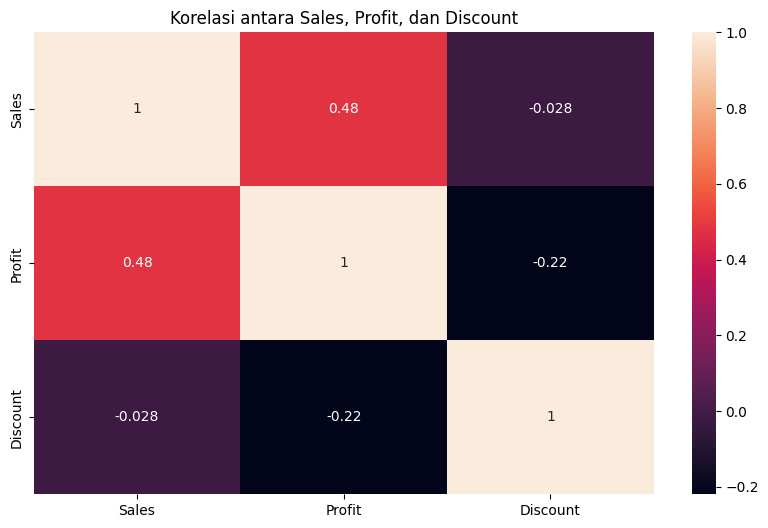

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned[['Sales', 'Profit', 'Discount']].corr(), annot=True)
plt.title('Korelasi antara Sales, Profit, dan Discount')
plt.show()

## 3. AVG profit per Kategori

C:\Users\jundi\AppData\Local\Temp\ipykernel_25968\328609541.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_cleaned, x='Category', y='Profit', estimator=np.mean, ci=None, palette='rocket', ax=ax[0,0])
C:\Users\jundi\AppData\Local\Temp\ipykernel_25968\328609541.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_cleaned, x='Category', y='Profit', estimator=np.mean, ci=None, palette='rocket', ax=ax[0,0])
C:\Users\jundi\AppData\Local\Temp\ipykernel_25968\328609541.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_cleaned, x='Category', y='Profit', estimator=np.sum, ci=None, palette='mako', ax=ax[0,1])
C:\Users\jundi\AppData\Local\Temp\ipykernel_25968\328609541.py:11: FutureWarning: 

Passin

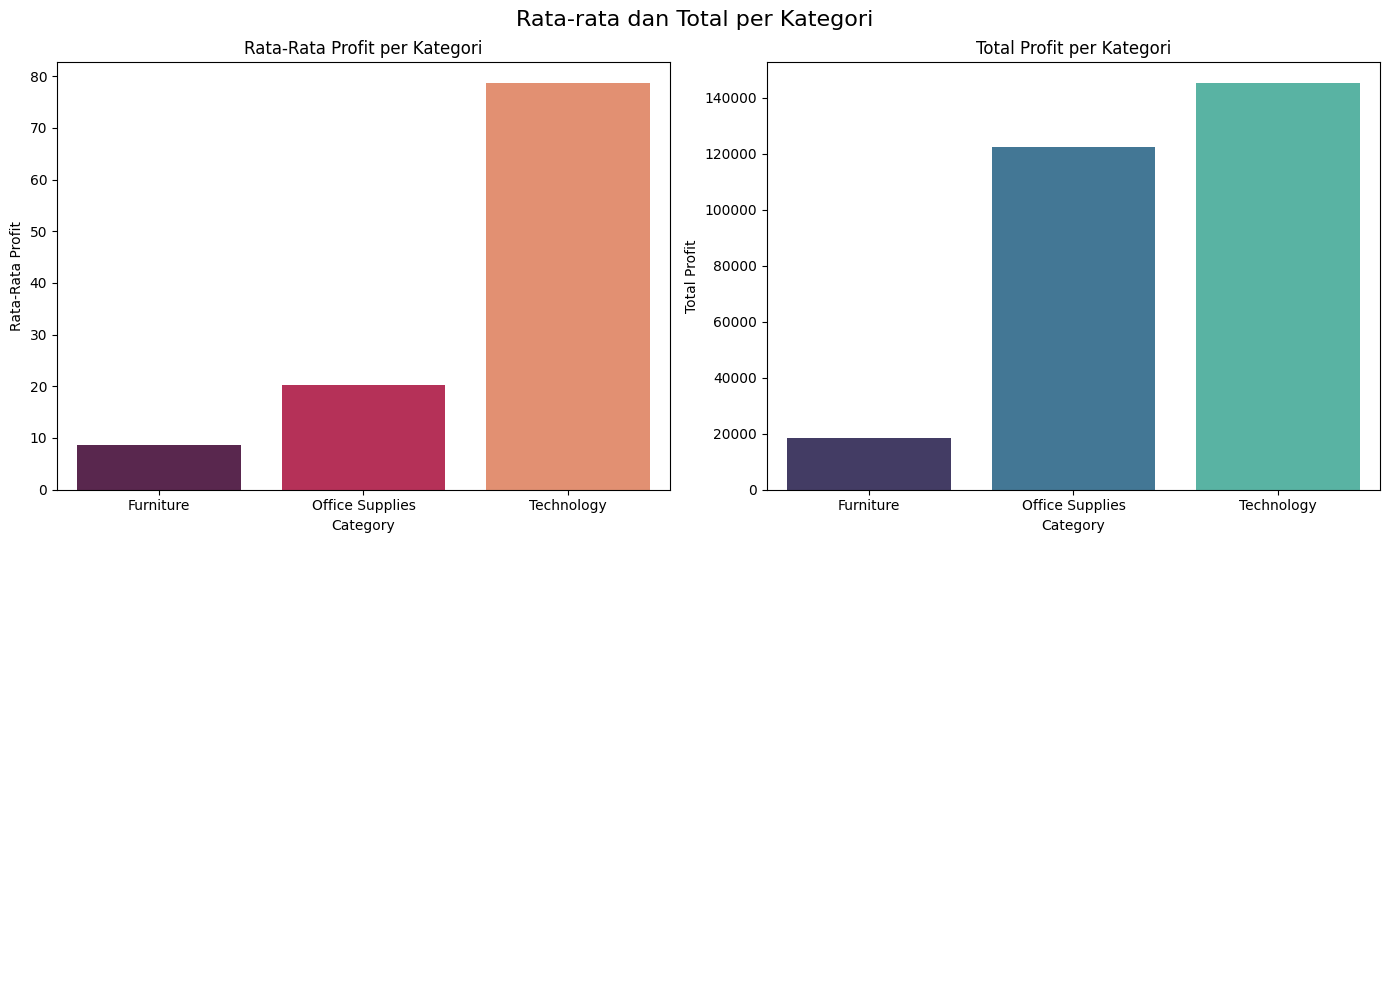

In [12]:
# Buat subplots 2x2
fig, ax = plt.subplots(2, 2, figsize=(14,10))
fig.suptitle('Rata-rata dan Total per Kategori', fontsize=16)

# Barplot Rata-Rata Profit per Kategori
sns.barplot(data=df_cleaned, x='Category', y='Profit', estimator=np.mean, ci=None, palette='rocket', ax=ax[0,0])
ax[0,0].set_title('Rata-Rata Profit per Kategori')
ax[0,0].set_ylabel('Rata-Rata Profit')

# Barplot Total Profit per Kategori
sns.barplot(data=df_cleaned, x='Category', y='Profit', estimator=np.sum, ci=None, palette='mako', ax=ax[0,1])
ax[0,1].set_title('Total Profit per Kategori')
ax[0,1].set_ylabel('Total Profit')

# Kosongkan subplot bawah jika tidak digunakan
ax[1,0].axis('off')
ax[1,1].axis('off')

# Atur tata letak agar tidak bertumpuk
plt.tight_layout()
plt.show()

## 4. Tren Waktu

<Figure size 1000x600 with 0 Axes>

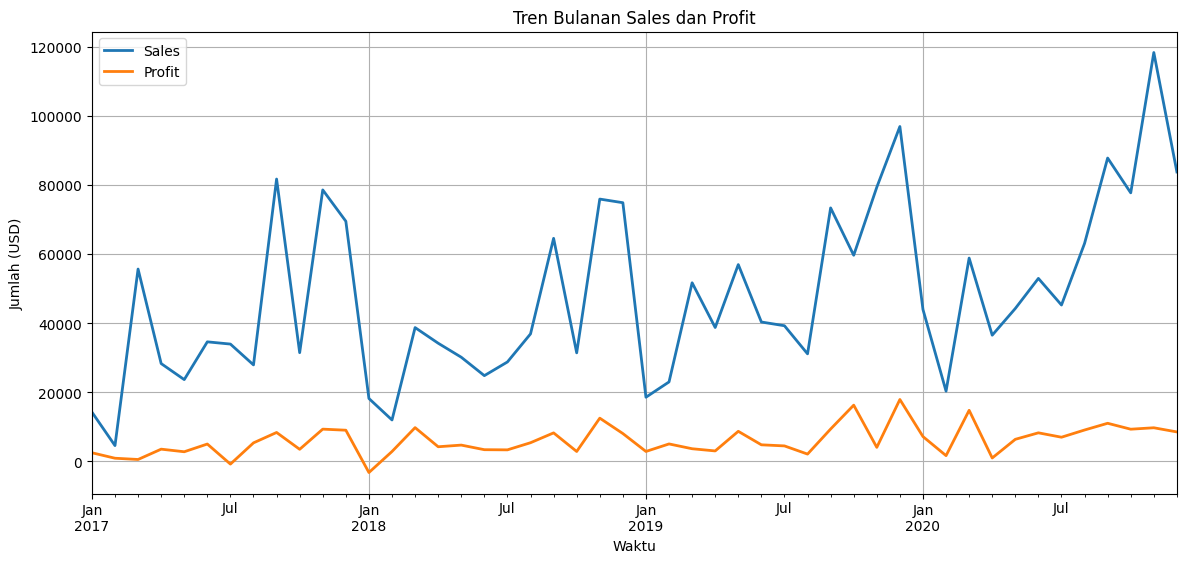

In [15]:
df_time = df_cleaned.set_index('Order_Date').resample('ME')[['Sales', 'Profit']].sum()

plt.figure(figsize=(10, 6))
df_time.plot(title='Tren Bulanan Sales dan Profit', figsize=(14,6), linewidth=2)
plt.ylabel('Jumlah (USD)')
plt.xlabel('Waktu')
plt.grid(True)
plt.show()

## 5. Segmentasi Pelanggan

C:\Users\jundi\AppData\Local\Temp\ipykernel_25968\467160567.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_segment.index, y=avg_segment.values, palette='Set2')


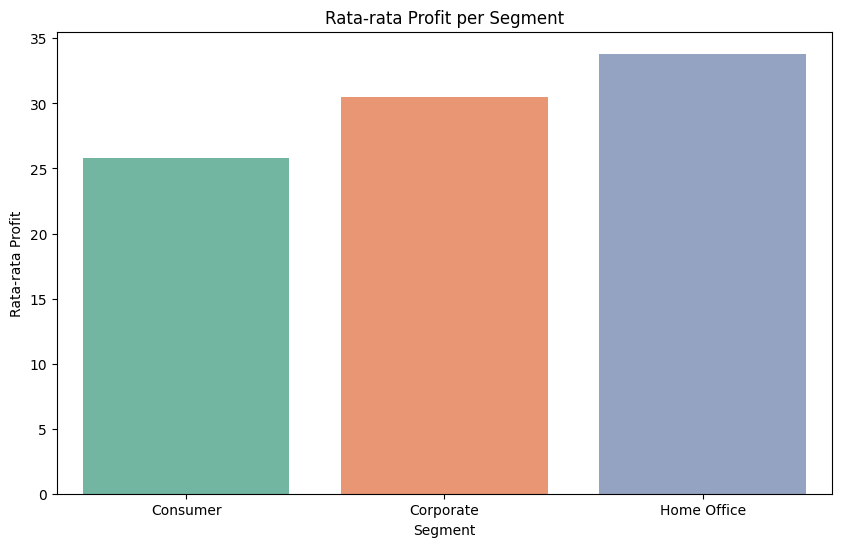

Segment
Consumer       25.836873
Corporate      30.456667
Home Office    33.818664
Name: Profit, dtype: float64

In [30]:
plt.figure(figsize=(10, 6))

avg_segment = df_cleaned.groupby('Segment')['Profit'].mean()
sns.barplot(x=avg_segment.index, y=avg_segment.values, palette='Set2')
plt.ylabel('Rata-rata Profit')
plt.title('Rata-rata Profit per Segment')
plt.show()
avg_segment

C:\Users\jundi\AppData\Local\Temp\ipykernel_25968\1023029405.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_segment.index, y=total_segment.values, palette='Set2')


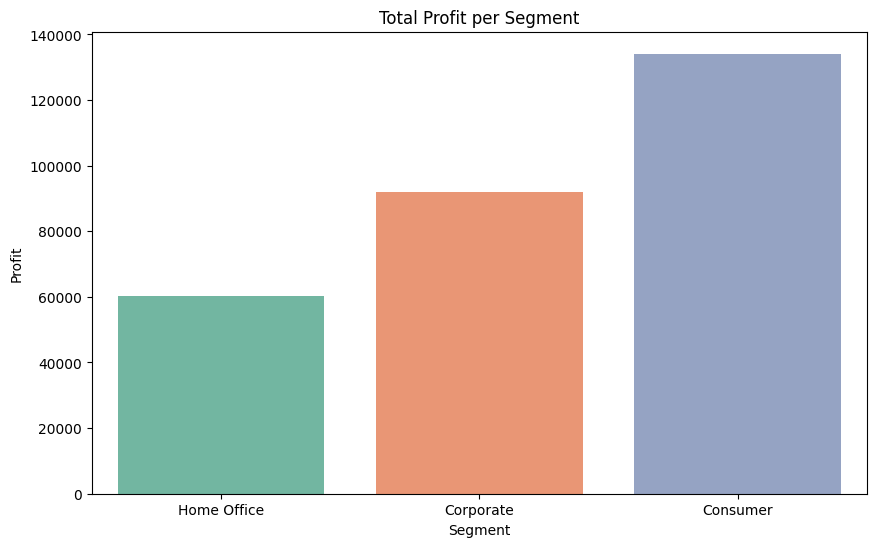

In [31]:
plt.figure(figsize=(10, 6))
total_segment = df_cleaned.groupby('Segment')['Profit'].sum().sort_values()
sns.barplot(x=total_segment.index, y=total_segment.values, palette='Set2')
plt.title('Total Profit per Segment')
plt.ylabel('Profit')
plt.show()

## 7. Sub-Category

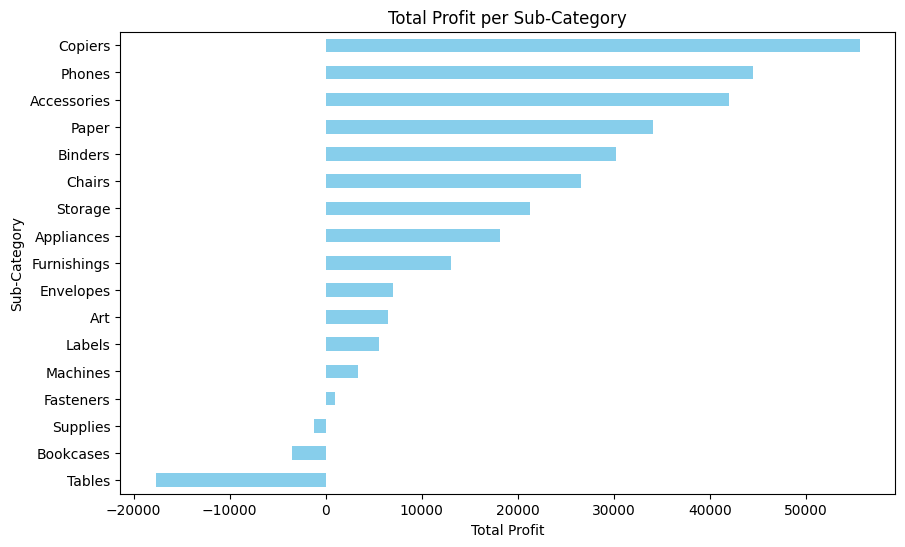

In [24]:
# Sub-kategori paling menguntungkan
subcat_profit = df_cleaned.groupby('Sub-Category')['Profit'].sum().sort_values()

# Visualisasi
subcat_profit.plot(kind='barh', color='skyblue', figsize=(10,6), title='Total Profit per Sub-Category')
plt.xlabel('Total Profit')
plt.show()

## 8. Segmentasi Region

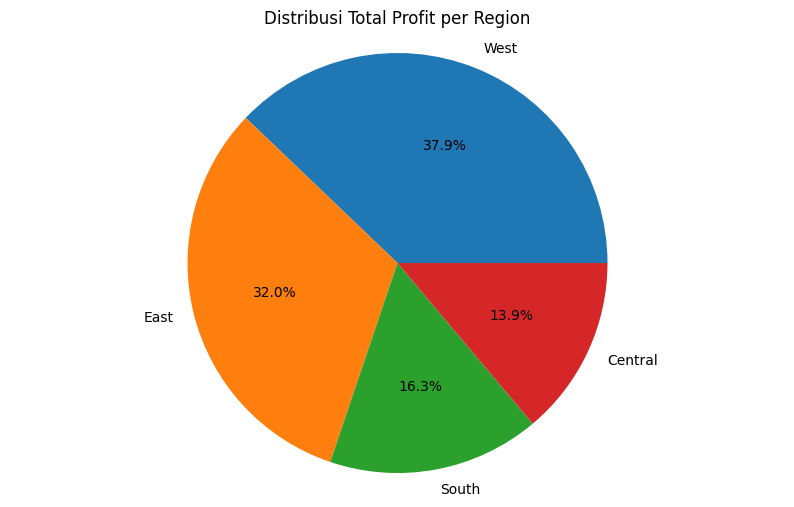

,Profit
Region,
West,108418.4489
East,91522.7800
South,46749.4303
Central,39706.3625


In [43]:
fig = plt.figure(figsize=(10, 6))
region = df_cleaned.groupby('Region').agg({'Profit': 'sum'}).sort_values('Profit', ascending=False)
plt.pie(region['Profit'], labels=region.index, autopct='%1.1f%%')
plt.title('Distribusi Total Profit per Region')
plt.axis('equal')
plt.show()
region

## 9. Top 10 Product with Highest Profit

C:\Users\jundi\AppData\Local\Temp\ipykernel_25968\1608554291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_products, x='Product_Name', y='Profit', palette='flare')


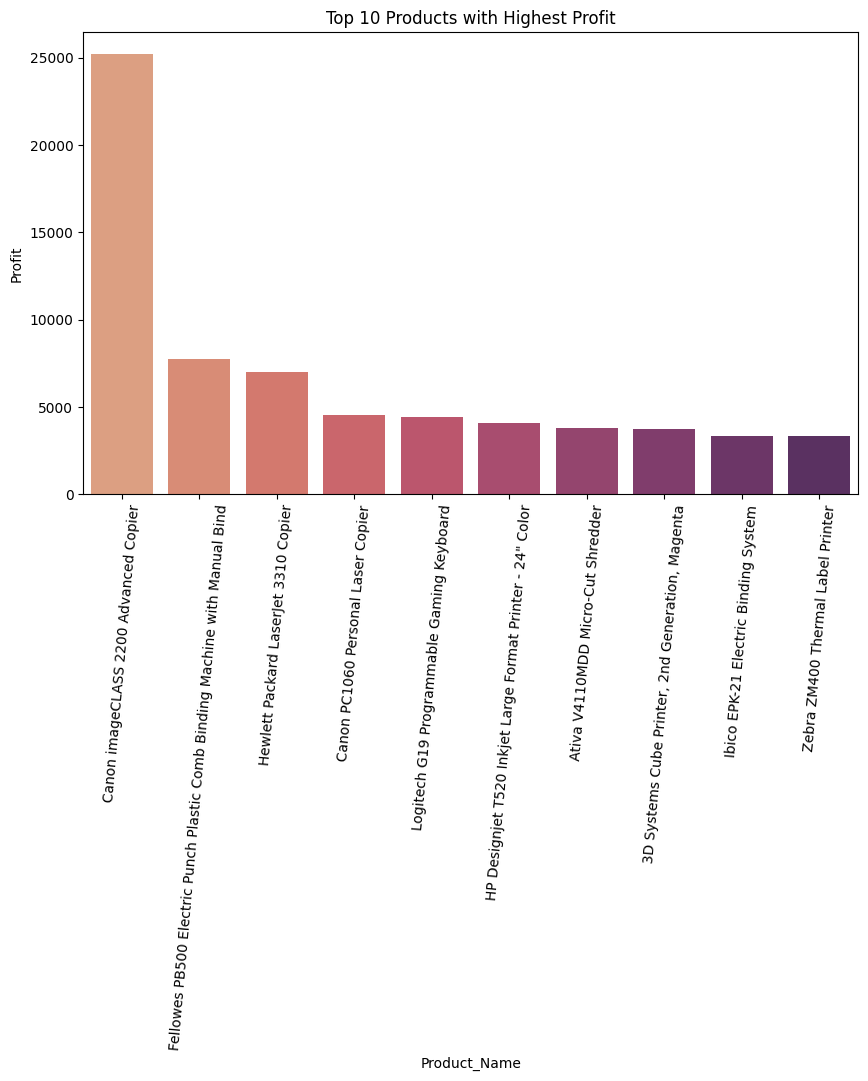

In [52]:
fig = plt.figure(figsize=(10, 6))
top10_products = df_cleaned.groupby('Product_Name').agg({'Profit': 'sum'}).sort_values('Profit', ascending=False).head(10)
sns.barplot(data=top10_products, x='Product_Name', y='Profit', palette='flare')
plt.title('Top 10 Products with Highest Profit')
plt.tick_params(axis='x', rotation=85)
plt.show()